<a href="https://colab.research.google.com/github/MahsaAbdollahiM/R_programming-/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://chatgpt.com/c/ca06bdd8-aafc-4ae6-b457-65ac9c989c46
# https://chatgpt.com/c/4f955f59-9b5a-4b37-8915-e9b6f1d1834c

In [2]:
#loading initial libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# question 3: What is the average item price and how does it vary over time?

###this is the steps to take for answering this question:

#### 1. Extract Time Information: If your dataset includes a time-related column (e.g., date, timestamp), extract relevant time information (e.g., year, month, day).
#### 2. Compute Average Item Price: Calculate the average item price for each time period (e.g., month, year).
#### 3. Visualize the Results: Use Matplotlib or Seaborn to create visualizations (e.g., line plot, bar plot) to show how the average item price varies over time.

In [3]:
#loading the "item"'s data set
items = pd.read_csv('/content/items.csv',delimiter = ",")

In [4]:
items.head()

,item_id,sku,item_name,item_cat,item_size,item_price
0,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,3.45
1,It002,HDR-CAP-LG,Cappuccino,Hot Drinks,Large,3.75
2,It003,HDR-LAT-MD,Latte,Hot Drinks,Medium,3.45
3,It004,HDR-LAT-LG,Latte,Hot Drinks,Large,3.75
4,It005,HDR-FLT,Flat White,Hot Drinks,NaN,3.15


In [5]:
#item_price = items["item_price"]
print(items.columns)

Index(['item_id', 'sku', 'item_name', 'item_cat', 'item_size', 'item_price'], dtype='object')


In [6]:
#remove leading and trailing whitespace from the column names (not necessary!)
#items.columns = items.columns.str.strip()

In [7]:
items["item_price"]

0     3.45
1     3.75
2     3.45
3     3.75
4     3.15
5     4.20
6     4.60
7     2.15
8     4.00
9     4.60
10    4.50
11    4.70
12    4.20
13    4.60
14    3.45
15    3.75
16    4.00
17    4.60
18    3.25
19    3.55
20    3.35
21    3.75
22    5.60
23    5.50
Name: item_price, dtype: float64

In [8]:
#calculating the average item prices
average_item_price = items["item_price"].mean()
print(f"The average price is: {average_item_price}")

The average price is: 3.995833333333333


In [9]:
#items["item_name"]
#not possible because from each we have two but with different prices

In [10]:
items["item_id"]

0     It001
1     It002
2     It003
3     It004
4     It005
5     It006
6     It007
7     It008
8     It009
9     It010
10    It011
11    It012
12    It013
13    It014
14    It015
15    It016
16    It017
17    It018
18    It019
19    It020
20    It021
21    It022
22    It023
23    It024
Name: item_id, dtype: object

In [38]:
for index, row in items.iterrows():
    print(f"item_name: {row['item_name']}, ID: {row['item_id']}")

AttributeError: 'set' object has no attribute 'iterrows'

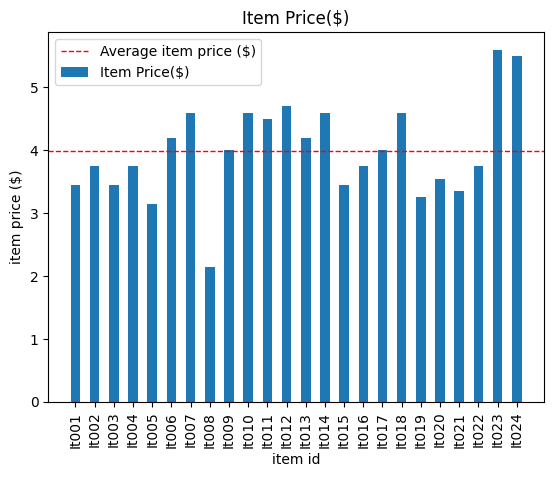

In [11]:
#Adding the labels and title
plt.xlabel('item id')
plt.ylabel('item price ($)')
plt.title('Item Price($)')

#making the bar plot
plt.bar(items["item_id"],items["item_price"],label = 'Item Price',width= .5)

# showing the average item price
plt.axhline(average_item_price, color='red', linestyle='dashed', linewidth=1)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

## Add legend to show the label for the average price line and item prices
plt.legend(['Average item price ($)', 'Item Price($)'])

plt.show()


# Are there any noticeable trends in customer preferences based on order history?


#Based on the time of the day, what is the order preferences?

####Explore Customer Preferences: Analyze order history to identify trends or patterns in customer preferences. This may involve looking at popular items, frequent purchases, or changes in purchasing behavior over time.

####Analyze Time of the Day: Examine order data based on the time of day to determine order preferences during different hours. This can help identify peak ordering times or preferred items during specific times of the day.

####Visualize the Results: Use Matplotlib or Seaborn to create visualizations that illustrate the trends and patterns identified in customer preferences and order timing.


In [12]:
#loading the data set
orders = pd.read_csv('/content/orders.csv',delimiter = ',')

In [28]:
orders["item_id"].unique()

array(['It008', 'It014', 'It019', 'It024', 'It001', 'It016', 'It005',
       'It020', 'It006', 'It018', 'It023', 'It011', 'It003', 'It007',
       'It009', 'It021', 'It012', 'It022', 'It004', 'It002', 'It017',
       'It0010', 'It015', 'It013', 'It010', 'It028', 'It027', 'It026',
       'It025'], dtype=object)

In [29]:
orders["item_id"].nunique()

29

In [14]:
#print orders columns
orders.columns

Index(['row_id', 'order_id', 'created_at', 'item_id', 'quantity', 'cust_name',
       'in_or_out'],
      dtype='object')

In [15]:
# Check first few rows of the DataFrame
orders.head()

,row_id,order_id,created_at,item_id,quantity,cust_name,in_or_out
0,1,ORD001,2024-02-12 07:04:19,It008,1,Alex,out
1,2,ORD002,2024-02-12 07:09:38,It014,1,Jordan,in
2,3,ORD003,2024-02-12 07:14:29,It008,1,Taylor,out
3,4,ORD004,2024-02-12 07:18:39,It019,1,Casey,out
4,5,ORD005,2024-02-12 07:23:44,It024,1,Jamie,out


In [16]:
# Count the occurrences of each item
item_counts = orders['item_id'].value_counts().sort_index()
#.sort_index()
print(item_counts)

item_id
It001     21
It0010     1
It002     19
It003     19
It004     19
It005     27
It006     20
It007     17
It008     19
It009     26
It010     12
It011     23
It012     20
It013     13
It014     22
It015     13
It016     18
It017     20
It018     27
It019     15
It020     21
It021     19
It022     21
It023     16
It024     19
It025     11
It026     15
It027     16
It028     12
Name: count, dtype: int64


In [17]:
sorted(orders['item_id'].unique())

['It001',
 'It0010',
 'It002',
 'It003',
 'It004',
 'It005',
 'It006',
 'It007',
 'It008',
 'It009',
 'It010',
 'It011',
 'It012',
 'It013',
 'It014',
 'It015',
 'It016',
 'It017',
 'It018',
 'It019',
 'It020',
 'It021',
 'It022',
 'It023',
 'It024',
 'It025',
 'It026',
 'It027',
 'It028']

In [18]:
orders['item_id'].nunique()

29

according to the numbers, we have 24 items.
how ever the orders is showing 29 items.
here is the differences:
'It0010',
 'It024',
 'It025',
 'It026',
 'It027',
 'It028'

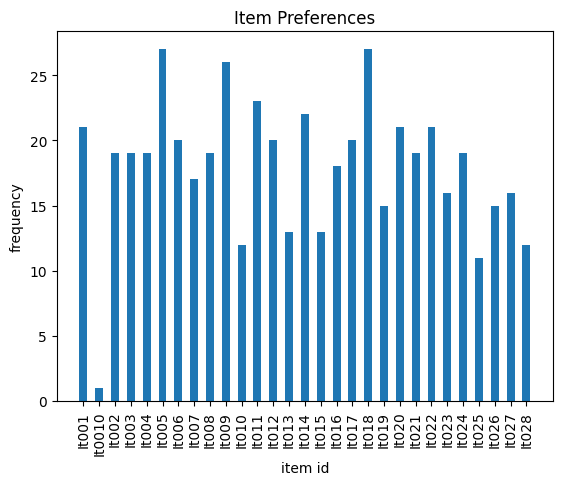

In [19]:
#Adding the labels and title
plt.xlabel('item id')
plt.ylabel('frequency')
plt.title('Item Preferences')





#making the bar plot
plt.bar(sorted(orders['item_id'].unique()),orders['item_id'].value_counts().sort_index()
,label = 'Item Preference',width= .5)






# Rotate x-axis labels vertically
plt.xticks(rotation=90)



plt.show()

I wanna plot this

Count the occurrences of each item

item_counts = orders['item_id'].value_counts()

and

orders['item_id'].unique()


 i need each variable from item_id to match with its exact item_count. but the problem here is that it only takes the first variable of each axix without paying attention to match each item_id together

In [20]:
#print item_id s to see what items have been ordered
#chack how many times

#load items file
#check what items have not been ordered


In [21]:
orders['in_or_out'].value_counts()

in_or_out
out    228
in     203
        58
Name: count, dtype: int64

#### We have 58 N/A data about in or out

In [22]:
orders['in_or_out'].unique()

array(['out', 'in', nan, ' '], dtype=object)

([<matplotlib.patches.Wedge at 0x7c78b4cded10>,
 [Text(-0.7922549710008008, -0.7631068476462, '228'),
  Text(1.0157031937460417, 0.4223115227105355, '203'),
  Text(-0.5274086815400447, 0.9653186430584421, '58')],
 [Text(-0.4321390750913458, -0.416240098716109, '46.6%'),
  Text(0.5540199238614772, 0.23035173966029204, '41.5%'),
  Text(-0.2876774626582062, 0.526537441668241, '11.9%')])

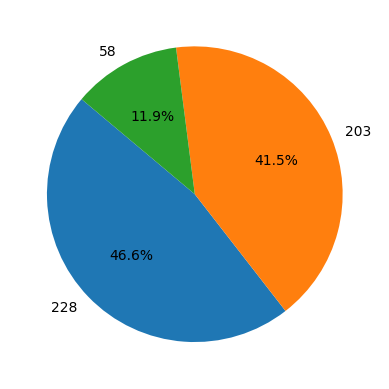

In [23]:
#create the pie chart
plt.pie(orders['in_or_out'].value_counts(), labels=orders['in_or_out'].value_counts(), autopct='%1.1f%%', startangle=140)


([<matplotlib.patches.Wedge at 0x7c78b4b41b10>,
 [Text(-0.7922549710008008, -0.7631068476462, '228'),
  Text(1.0157031937460417, 0.4223115227105355, '203'),
  Text(-0.5274086815400447, 0.9653186430584421, '58')])

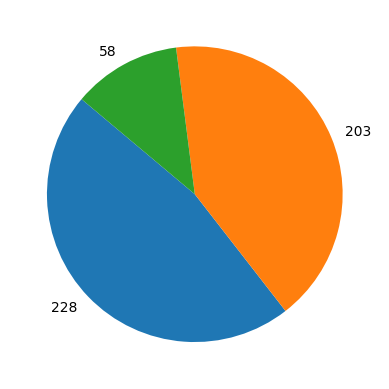

In [24]:
#create the pie chart
plt.pie(orders['in_or_out'].value_counts(), labels=orders['in_or_out'].value_counts(), startangle=140)


#•	Can we segment customers based on their purchasing behavior and predict their preferences?
•	Use clustering algorithms and logistic regression to identify customer segments and predict their likely future purchases.


####Feature Engineering: Extract relevant features from your dataset that describe customer purchasing behavior. This could include variables such as frequency of purchases, total amount spent, types of products purchased, etc.

####Customer Segmentation: Apply clustering algorithms (e.g., K-means, hierarchical clustering) to segment customers based on their purchasing behavior. This will group customers with similar behavior into clusters.

####Model Training: Train a logistic regression model for each customer segment to predict their likely future purchases. You'll use historical data as features and the target variable could be binary (e.g., whether a customer purchases a specific product or not within a certain time period).

####Model Evaluation: Evaluate the performance of your logistic regression models using appropriate metrics (e.g., accuracy, precision, recall).

####Predictive Analysis: Use the trained logistic regression models to make predictions for new customers or existing customers' future purchases.

In [24]:
# hot drink, cold drink, snacks